In [1]:
import pandas as pd
df = pd.read_csv(r'C:\\Users\\myria\\Downloads\\titanic-passengers.csv', delimiter=';', encoding ="cp1252")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
#general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
#Search for missing information in each column
df['PassengerId'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: PassengerId, Length: 891, dtype: bool

In [4]:
df['Pclass'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Pclass, Length: 891, dtype: bool

In [5]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889     True
890    False
Name: Age, Length: 891, dtype: bool

In [6]:
df['Cabin'].isnull()

0       True
1      False
2       True
3       True
4      False
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Cabin, Length: 891, dtype: bool

In [7]:
#replace Nan in Age with the average of set of numbers
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [8]:
#Replace Nan in Cabin with G6
df['Cabin'].fillna('G6', inplace=True)

In [9]:
#Nan are replaced
df.head()
#our data is now ready to be treated

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


(array([0, 1]), [Text(0, 0, 'male'), Text(1, 0, 'female')])

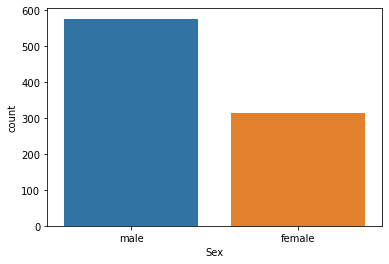

In [14]:
#visualize differene of numbers male VS female
import seaborn as sns 
import matplotlib.pyplot as plt
sns.countplot(x='Sex', data=df)
plt.xticks()

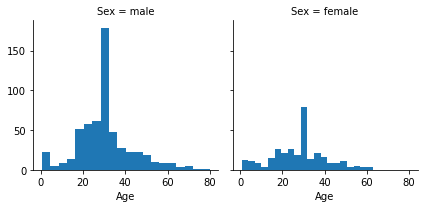

In [15]:
#Visualize the correlation between Sex and Age
g=sns.FacetGrid(df, col='Sex')
g.map(plt.hist, 'Age', bins=20)

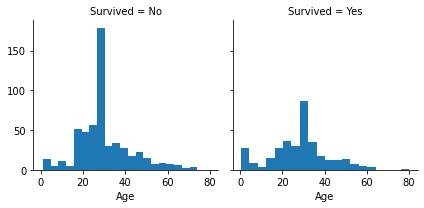

In [16]:
#Visualize the correlation between Survived and Age
g=sns.FacetGrid(df, col="Survived")
g.map(plt.hist,'Age',bins=20)

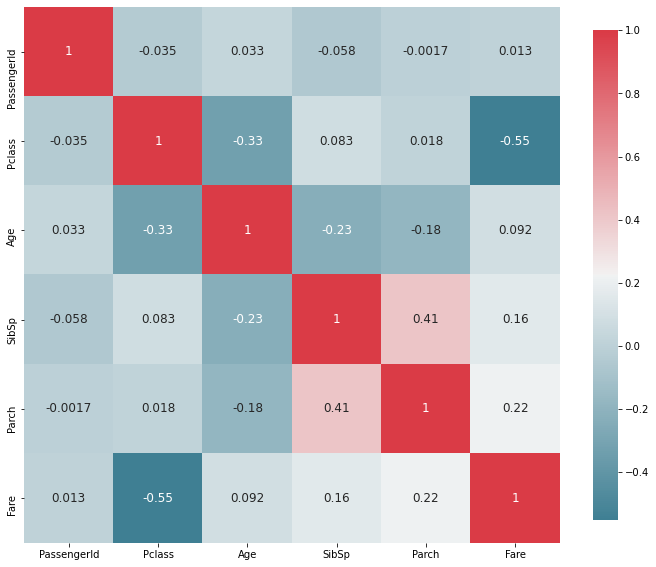

In [17]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={'shrink':.9 }, ax=ax, annot = True, annot_kws = {'fontsize' : 12 })
    
plot_correlation_map(df)
#this function allow us to see the correlation between each features to pick up the most importante feature: 
#the nearest to 1 shows the most importante realtion between features

In [18]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 
cleanup={"Survived":{"Yes":1, "No": 0}}  # at first, let's convert Survived to numerical format
df.replace(cleanup, inplace=True)
df[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [20]:
def title(ch):
    return ch.split(', ')[1].split('. ')[0]

df["Title"]=df["Name"].map(title)

Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",
    
                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

df["Title"]=df["Title"].map(Title_Dictionary)

df["Title"].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [21]:
df.drop(["Name"], axis = 1, inplace=True)
df.drop(["Ticket"], axis = 1, inplace=True)
df.drop(["Fare"], axis = 1, inplace=True)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title
0,343,0,2,male,28.0,0,0,G6,S,Mrs
1,76,0,3,male,25.0,0,0,F G73,S,Mrs
2,641,0,3,male,20.0,0,0,G6,S,Mrs
3,568,0,3,female,29.0,0,4,G6,S,Mrs
4,672,0,1,male,31.0,1,0,B71,S,Mrs


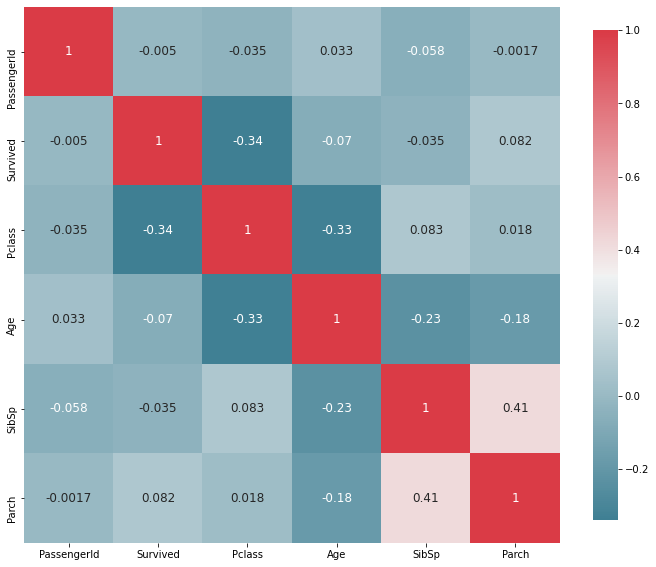

In [23]:
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(corr, cmap = cmap,square=True, cbar_kws={'shrink':.9 }, ax=ax, annot = True, annot_kws = {'fontsize' : 12 })
    
plot_correlation_map(df)
#now its more obvious to select important features wich are near to one

In [25]:
df["FamilySize"]= df["Parch"] + df["SibSp"] + 1
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,FamilySize
0,343,0,2,male,28.0,0,0,G6,S,Mrs,1
1,76,0,3,male,25.0,0,0,F G73,S,Mrs,1
2,641,0,3,male,20.0,0,0,G6,S,Mrs,1
3,568,0,3,female,29.0,0,4,G6,S,Mrs,5
4,672,0,1,male,31.0,1,0,B71,S,Mrs,2
5,105,0,3,male,37.0,2,0,G6,S,Mrs,3
6,576,0,3,male,19.0,0,0,G6,S,Mrs,1
7,382,1,3,female,1.0,0,2,G6,C,Miss,3
8,228,0,3,male,20.5,0,0,G6,S,Mrs,1
9,433,1,2,female,42.0,1,0,G6,S,Mrs,2


In [ ]:
#the FamilySize column is a uselful feature as the correlation between SibSp and Parch is 0.41 which is approximately near to 1